In [1]:
from IPython.display import Image

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston() 
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([X, y], axis=1)

In [3]:
df
# 데이터는 보스턴 집값예측으로, MEDV 를 예측해야한다. 곁측치가 하나도 없는 데이터임.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Train_test_Split

- Train_test_split 을 할 때에도 y 의 클래스에 따라서 그 클래스의 비율을 유지하게 할 수 있다.

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, dtype="category")

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y)

In [39]:
y_train.value_counts()

2    40
1    40
0    40
dtype: int64

In [40]:
y_val.value_counts()

2    10
1    10
0    10
dtype: int64

# K-folds

## Shuffle = False

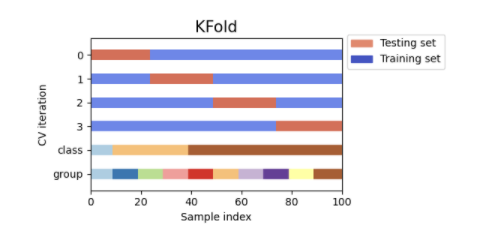

In [4]:
Image('Pictures/Cross Validation1.png')
# 아래 처럼 K-fold 는 Testing 과 Training 을 나눌 뿐, class 의 비율 등에 관심을 가지지 않는다.

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

X=np.array([
    [ 1, 2, 3, 4],
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44],
    [51,52,53,54],
    [61,62,63,64],
    [71,72,73,74]
])

y=np.array([0,0,0,0,0,0,0,0])

kfold = KFold(n_splits=4,shuffle=False) 
# suffle 을 false 로 두고 돌리게 되면, 아래와 같이 validation 이 그냥 순차적으로 짤리게 된다.
print(X.shape, y.shape)

print("\nKFold**************")
for train_index, validate_index in kfold.split(X):
    # kfold 는 2개의 index 를 내뱉는데, 그건 train index 와 test index 이다. 
    # 그 두개의 인덱스를 아래와 같이 train, validation 으로 구분하여서 받게 되면 우리가 원하는 X_train/test 가 되는것이다.
    print("train index:", train_index, "validate index:", validate_index)
    # train_dindex 와 validation index 를 list 형태로 받게된다.
    X_train, X_validate = X[train_index], X[validate_index]
    y_train, y_validate = y[train_index], y[validate_index]
    print("train data")
    print(X_train, y_train)
    print("validate data")
    print(X_validate, y_validate)
    # 이제 이 부분에서 fitting 과, 평가를 진행하고, 그 에러를 n_splits 만큼 나누게 된다면 cv 를 진행한것이 된다.

(8, 4) (8,)

KFold**************
train index: [2 3 4 5 6 7] validate index: [0 1]
train data
[[21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]] [0 0 0 0 0 0]
validate data
[[ 1  2  3  4]
 [11 12 13 14]] [0 0]
train index: [0 1 4 5 6 7] validate index: [2 3]
train data
[[ 1  2  3  4]
 [11 12 13 14]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]] [0 0 0 0 0 0]
validate data
[[21 22 23 24]
 [31 32 33 34]] [0 0]
train index: [0 1 2 3 6 7] validate index: [4 5]
train data
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [61 62 63 64]
 [71 72 73 74]] [0 0 0 0 0 0]
validate data
[[41 42 43 44]
 [51 52 53 54]] [0 0]
train index: [0 1 2 3 4 5] validate index: [6 7]
train data
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]] [0 0 0 0 0 0]
validate data
[[61 62 63 64]
 [71 72 73 74]] [0 0]


## Shuffle = True

- Shuffle 을 True 로 놓게 된다면, 우리가 사전에 정의한 random state 에 따라서, index 들을 랜덤하게 나누게 된다.
- 이때 Cross validation 에 들어갓던 index 들은 그 이후 set에서 나오지 않는다.
    - 즉 validation index 가 겹치지 않는다는것

In [10]:
kfold = KFold(n_splits=4,random_state=0,shuffle=True) 
# suffle 을 false 로 두고 돌리게 되면, 아래와 같이 validation 이 그냥 순차적으로 짤리게 된다.
print(X.shape, y.shape)

print("\nKFold**************")
for train_index, validate_index in kfold.split(X):
    print("train index:", train_index, "validate index:", validate_index)
    X_train, X_validate = X[train_index], X[validate_index]
    y_train, y_validate = y[train_index], y[validate_index]
    print("train data")
    print(X_train, y_train)
    print("validate data")
    print(X_validate, y_validate)

(8, 4) (8,)

KFold**************
train index: [0 1 3 4 5 7] validate index: [2 6]
train data
[[ 1  2  3  4]
 [11 12 13 14]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [71 72 73 74]] [0 0 0 0 0 0]
validate data
[[21 22 23 24]
 [61 62 63 64]] [0 0]
train index: [0 2 3 4 5 6] validate index: [1 7]
train data
[[ 1  2  3  4]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]] [0 0 0 0 0 0]
validate data
[[11 12 13 14]
 [71 72 73 74]] [0 0]
train index: [1 2 4 5 6 7] validate index: [0 3]
train data
[[11 12 13 14]
 [21 22 23 24]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]] [0 0 0 0 0 0]
validate data
[[ 1  2  3  4]
 [31 32 33 34]] [0 0]
train index: [0 1 2 3 6 7] validate index: [4 5]
train data
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [61 62 63 64]
 [71 72 73 74]] [0 0 0 0 0 0]
validate data
[[41 42 43 44]
 [51 52 53 54]] [0 0]


# Shuffle & Split

- 각 index 들을 shuffle 한 이후에 랜덤하게 뽑는다는 의미이다
- 전에 쓴 인덱스 들도, 다시 사용하는게 가능하다. 
- 그에 따라서 인덱스 겹침 현상이 나타나고, 중복된 데이터를 사용하는 현상이 나타날 수 있다.

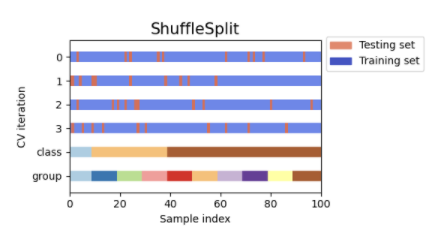

In [11]:
Image('Pictures/Cross Validation2.png')
# 아래 처럼 Shuffle/split 은 인덱스가 '겹칠' 수 있다.

In [13]:
from sklearn.model_selection import ShuffleSplit

In [14]:
shuffle = ShuffleSplit(n_splits=4,random_state=0,test_size=0.25) 
print(X.shape, y.shape)

print("\nKFold**************")
for train_index, validate_index in shuffle.split(X):
    print("train index:", train_index, "validate index:", validate_index)
    X_train, X_validate = X[train_index], X[validate_index]
    y_train, y_validate = y[train_index], y[validate_index]
    print("train data")
    print(X_train, y_train)
    print("validate data")
    print(X_validate, y_validate)

(8, 4) (8,)

KFold**************
train index: [1 7 3 0 5 4] validate index: [6 2]
train data
[[11 12 13 14]
 [71 72 73 74]
 [31 32 33 34]
 [ 1  2  3  4]
 [51 52 53 54]
 [41 42 43 44]] [0 0 0 0 0 0]
validate data
[[61 62 63 64]
 [21 22 23 24]] [0 0]
train index: [3 7 0 4 2 5] validate index: [1 6]
train data
[[31 32 33 34]
 [71 72 73 74]
 [ 1  2  3  4]
 [41 42 43 44]
 [21 22 23 24]
 [51 52 53 54]] [0 0 0 0 0 0]
validate data
[[11 12 13 14]
 [61 62 63 64]] [0 0]
train index: [3 4 7 0 6 1] validate index: [5 2]
train data
[[31 32 33 34]
 [41 42 43 44]
 [71 72 73 74]
 [ 1  2  3  4]
 [61 62 63 64]
 [11 12 13 14]] [0 0 0 0 0 0]
validate data
[[51 52 53 54]
 [21 22 23 24]] [0 0]
train index: [6 7 3 4 1 0] validate index: [2 5]
train data
[[61 62 63 64]
 [71 72 73 74]
 [31 32 33 34]
 [41 42 43 44]
 [11 12 13 14]
 [ 1  2  3  4]] [0 0 0 0 0 0]
validate data
[[21 22 23 24]
 [51 52 53 54]] [0 0]


# StratifiedKFold

- 우리의 target 이 categorical 일 때에만 사용한다. regression 일 때에는 kfold 를 써야함.

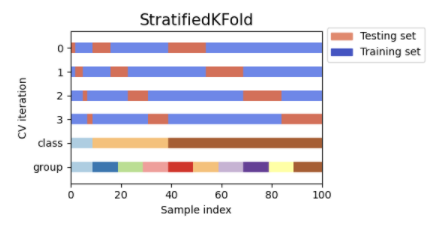

In [15]:
Image('Pictures/Cross Validation3.png')

- 나눌때 최대한 class, group 등에 대한 분포를 유지한 채로 Testing 과 training 을 나누려고 한다.

In [16]:
stratifiedkfold = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
print(X.shape, y.shape)

print("\nStratifiedKFold**************")
for train_index, validate_index in stratifiedkfold.split(X,y):
    print("train index:", train_index, "validate index:", validate_index)
    X_train, X_validate = X[train_index], X[validate_index]
    y_train, y_validate = y[train_index], y[validate_index]
    print("train data")
    print(X_train, y_train)
    print("validate data")
    print(X_validate, y_validate)

(8, 4) (8,)

StratifiedKFold**************
train index: [0 1 3 4 6 7] validate index: [2 5]
train data
[[ 1  2  3  4]
 [11 12 13 14]
 [31 32 33 34]
 [41 42 43 44]
 [61 62 63 64]
 [71 72 73 74]] [0 0 0 0 0 0]
validate data
[[21 22 23 24]
 [51 52 53 54]] [0 0]
train index: [0 2 3 5 6 7] validate index: [1 4]
train data
[[ 1  2  3  4]
 [21 22 23 24]
 [31 32 33 34]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]] [0 0 0 0 0 0]
validate data
[[11 12 13 14]
 [41 42 43 44]] [0 0]
train index: [0 1 2 3 4 5] validate index: [6 7]
train data
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]] [0 0 0 0 0 0]
validate data
[[61 62 63 64]
 [71 72 73 74]] [0 0]
train index: [1 2 4 5 6 7] validate index: [0 3]
train data
[[11 12 13 14]
 [21 22 23 24]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]] [0 0 0 0 0 0]
validate data
[[ 1  2  3  4]
 [31 32 33 34]] [0 0]


In [17]:
# 아래와 같이 y 의 클래스가 3개 인 0 값이 있고, 이 값은 4보다 작아서 에러가 난다.
# 어쩃든 split 이, class 의 수 보다 많은 상황인데 이런 상황은 매우 드물어서(실제데이터는 거의 몇만개인데 당연히 각 정답 클래스는 적어도 10개 이상일것. 그리고 split 의 수도 대게 5개만 쓰므로) 
# 그냥 알아두기만 하자. 

In [18]:
y=np.array([1,2,3,4,5,0,0,0])
print("\nStratifiedKFold**************")
for train_index, validate_index in stratifiedkfold.split(X,y):
    print("train index:", train_index, "validate index:", validate_index)
    X_train, X_validate = X[train_index], X[validate_index]
    y_train, y_validate = y[train_index], y[validate_index]
    print("train data")
    print(X_train, y_train)
    print("validate data")
    print(X_validate, y_validate)


StratifiedKFold**************


ValueError: n_splits=4 cannot be greater than the number of members in each class.

# 실제 적용

## 모듈 import

In [20]:
import numpy as np 
import pandas as pd 
import os

from scipy import stats
from sklearn.model_selection import KFold

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn import linear_model

import datetime

In [87]:
train = df[:400] 
test = df[400:]

In [96]:
# 훈련용 데이터 준비
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = train.iloc[:,-1]

# K Fold 및 기본 데이터 준비
# fold 는 기본적으로 shffle 을 주고, random state 를 지정하여 재현성을 갖춘다.
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
oof_preds = np.zeros(train.shape[0])

## Catboost

In [115]:
# catboost 이용
print("using catboost")
sub_preds_catboost = np.zeros(test.shape[0])
# sub pred 는 여기서 제출용의 pred 값이다. test set 은 
oof_preds_catboost = np.zeros(train.shape[0])
# oof_pred 란, CV 를 시행시 Train set 에서 설정한 fold 로 나누어주는 과정을 거치는데, 그 과정 내에서(fold 가 5라면) 
# 4/5 는 training ,나미저 1/5 는 예측하는 과정을 5번 반복하여, 결국에는 full train set 에 대해 예측을 하게 된다.
# 그 예측값을 oof predict(Out-of-fold predictions) 이라고 한다.
# 그 예측값을 담아내기 위해 oof_pre_catboost 라는 행렬을 만들었고, 그 길이는 train 의 row(데이터 수) 만큼으로 생성
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train)) :
    # enumerate 를 통해서 몇번째 fold 인지(n_fold) 를 구분할 수 있게 해준다. 
    # 물론 그냥 없이 할 수 있지만, 구분하기 쉬워지고, n_fold 를 통해 각 CV 의 성능을 알아볼 수 도 있다.
    trn_x, trn_y = x_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = x_train.iloc[val_idx], y_train.iloc[val_idx]
    cb_model = CatBoostRegressor(iterations=1000,
                                 learning_rate=0.1,
                                 depth=4, # 최대 depth 크기
                                 l2_leaf_reg=20,
                                 bootstrap_type='Bernoulli', 
                                 subsample=0.6,
                                 eval_metric='RMSE',
                                 metric_period=50,
                                 od_type='Iter',
                                 od_wait=45,
                                 random_seed=17,
                                 allow_writing_files=False)
    cb_model.fit(trn_x, trn_y,
             eval_set=(val_x, val_y), # validation 을 통해서 iteration 의 크기를 정해주어야 한다.
             cat_features=[],
             use_best_model=True, # 최고 모델만 사용
             verbose=True)
    oof_preds_catboost[val_idx] = cb_model.predict(val_x) # validation 에 대한 prediction 
    sub_preds_catboost += cb_model.predict(x_test) / folds.n_splits 
    # 각 n fold 에 대해서 test 에 대한 예측값을 모두 더해준 후, prediction 값을 folds 만큼 더해준다. (즉 n.splits 수만큼의 모델 예측 평균)
    # 왜 위의 코드가 필요한가? : tree boosting 모델은 iteration 조절을 위해 eval set 이 필요하다. -> 이는 결국 train set/ eval set 을 나누면 train set에 오버피팅이 있을 수 있다. 
    # 즉 이런 overfitting 을 최대한 줄이고자 각 k-fold 로 나눈 샘플에 대해 5번 fitting 을 진행해서 overfitting 문제를 줄여나간거.

using catboost
0:	learn: 8.7481851	test: 8.9221292	best: 8.9221292 (0)	total: 910us	remaining: 910ms
50:	learn: 3.7734010	test: 4.1347607	best: 4.1347607 (50)	total: 39.8ms	remaining: 741ms
100:	learn: 2.9793828	test: 3.6454644	best: 3.6454644 (100)	total: 84.6ms	remaining: 753ms
150:	learn: 2.5197815	test: 3.4023703	best: 3.4003207 (147)	total: 127ms	remaining: 714ms
200:	learn: 2.2588207	test: 3.2989899	best: 3.2989899 (200)	total: 161ms	remaining: 640ms


250:	learn: 2.0157408	test: 3.1665729	best: 3.1665729 (250)	total: 197ms	remaining: 588ms
300:	learn: 1.8558110	test: 3.1213532	best: 3.1213532 (300)	total: 230ms	remaining: 534ms
350:	learn: 1.6958002	test: 3.0692314	best: 3.0692314 (350)	total: 262ms	remaining: 484ms
400:	learn: 1.5801724	test: 3.0257697	best: 3.0257697 (400)	total: 291ms	remaining: 434ms
450:	learn: 1.4631518	test: 2.9859782	best: 2.9823302 (449)	total: 340ms	remaining: 414ms
500:	learn: 1.3574936	test: 2.9627959	best: 2.9616919 (491)	total: 377ms	remaining: 375ms
550:	learn: 1.2508529	test: 2.9375951	best: 2.9359679 (536)	total: 411ms	remaining: 335ms
600:	learn: 1.1754507	test: 2.9128618	best: 2.9126261 (594)	total: 443ms	remaining: 294ms
650:	learn: 1.0990012	test: 2.8928874	best: 2.8924895 (640)	total: 470ms	remaining: 252ms
700:	learn: 1.0283521	test: 2.8944013	best: 2.8895111 (694)	total: 498ms	remaining: 212ms
Stopped by overfitting detector  (45 iterations wait)

bestTest = 2.889511143
bestIteration = 694

S

150:	learn: 2.4889419	test: 2.3963149	best: 2.3953779 (149)	total: 164ms	remaining: 921ms
200:	learn: 2.2069515	test: 2.3661546	best: 2.3661546 (200)	total: 203ms	remaining: 808ms
250:	learn: 1.9844287	test: 2.3660407	best: 2.3577055 (209)	total: 241ms	remaining: 720ms
Stopped by overfitting detector  (45 iterations wait)

bestTest = 2.357705486
bestIteration = 209

Shrink model to first 210 iterations.
0:	learn: 8.3325603	test: 10.7555236	best: 10.7555236 (0)	total: 1.03ms	remaining: 1.03s


50:	learn: 3.5368804	test: 5.7596228	best: 5.7596228 (50)	total: 42.5ms	remaining: 792ms
100:	learn: 2.8836748	test: 4.8663794	best: 4.8663794 (100)	total: 82.4ms	remaining: 733ms
150:	learn: 2.5575759	test: 4.5108647	best: 4.5108647 (150)	total: 116ms	remaining: 655ms
200:	learn: 2.3523450	test: 4.2708384	best: 4.2708384 (200)	total: 148ms	remaining: 588ms
250:	learn: 2.1666255	test: 4.0798828	best: 4.0793723 (249)	total: 178ms	remaining: 532ms
300:	learn: 2.0178001	test: 3.9126016	best: 3.9126016 (300)	total: 208ms	remaining: 483ms
350:	learn: 1.8835914	test: 3.8062795	best: 3.8059715 (348)	total: 251ms	remaining: 463ms
400:	learn: 1.7346747	test: 3.6873217	best: 3.6873217 (400)	total: 289ms	remaining: 432ms
450:	learn: 1.6266242	test: 3.6087158	best: 3.6080978 (442)	total: 326ms	remaining: 396ms
500:	learn: 1.5146206	test: 3.5549229	best: 3.5549229 (500)	total: 361ms	remaining: 360ms
550:	learn: 1.4211539	test: 3.4972875	best: 3.4962423 (546)	total: 405ms	remaining: 330ms
600:	learn

100:	learn: 2.8813985	test: 3.3080310	best: 3.3080310 (100)	total: 101ms	remaining: 901ms
150:	learn: 2.4695336	test: 3.1047825	best: 3.1043826 (148)	total: 140ms	remaining: 786ms
200:	learn: 2.2002082	test: 2.9830632	best: 2.9813499 (195)	total: 177ms	remaining: 705ms
250:	learn: 2.0407793	test: 2.9125235	best: 2.9125235 (250)	total: 213ms	remaining: 635ms
300:	learn: 1.8638464	test: 2.8678022	best: 2.8678022 (300)	total: 246ms	remaining: 571ms
350:	learn: 1.7260296	test: 2.8362070	best: 2.8339919 (348)	total: 278ms	remaining: 515ms
400:	learn: 1.6050382	test: 2.8004107	best: 2.8004107 (400)	total: 310ms	remaining: 463ms
450:	learn: 1.4831110	test: 2.7744596	best: 2.7744596 (450)	total: 344ms	remaining: 419ms
500:	learn: 1.3737358	test: 2.7456228	best: 2.7430432 (487)	total: 377ms	remaining: 376ms
550:	learn: 1.2897281	test: 2.7383693	best: 2.7383693 (550)	total: 420ms	remaining: 343ms
600:	learn: 1.2051570	test: 2.7306854	best: 2.7289024 (597)	total: 467ms	remaining: 310ms
650:	learn

0:	learn: 8.9070420	test: 8.1675698	best: 8.1675698 (0)	total: 963us	remaining: 963ms
50:	learn: 3.5358336	test: 4.6007362	best: 4.6007362 (50)	total: 42.2ms	remaining: 785ms
100:	learn: 2.7709197	test: 4.0747964	best: 4.0747964 (100)	total: 77.8ms	remaining: 692ms
150:	learn: 2.4078809	test: 3.7952318	best: 3.7952318 (150)	total: 115ms	remaining: 649ms
200:	learn: 2.1612886	test: 3.6262946	best: 3.6262946 (200)	total: 153ms	remaining: 610ms
250:	learn: 2.0211365	test: 3.5384374	best: 3.5384374 (250)	total: 190ms	remaining: 566ms
300:	learn: 1.8717534	test: 3.4533008	best: 3.4533008 (300)	total: 223ms	remaining: 518ms
350:	learn: 1.7274366	test: 3.3967091	best: 3.3967091 (350)	total: 260ms	remaining: 481ms
400:	learn: 1.5948810	test: 3.3646079	best: 3.3629357 (398)	total: 305ms	remaining: 456ms
450:	learn: 1.4800258	test: 3.3499805	best: 3.3472695 (449)	total: 354ms	remaining: 431ms
Stopped by overfitting detector  (45 iterations wait)

bestTest = 3.347269462
bestIteration = 449

Shrin

In [116]:
sub_cat = pd.DataFrame()
sub_cat['target'] = sub_preds_catboost

## LGB

In [118]:
# lgm 이용
print("lightgbm")
sub_preds_lgm = np.zeros(test.shape[0])
oof_preds_lgm = np.zeros(train.shape[0])

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train)) :
    trn_x, trn_y = x_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = x_train.iloc[val_idx], y_train.iloc[val_idx]
    params = {'learning_rate': 0.01, 
              'max_depth': 16, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'rmse', 
              'is_training_metric': True, 
              'num_leaves': 144, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'seed':2018}

    train_T = lgb.Dataset(trn_x, label=trn_y)
    val_T = lgb.Dataset(val_x, label=val_y)
    
    model1 = lgb.train(params, train_T, 1000, val_T, verbose_eval=100, early_stopping_rounds=100)
    
    sub_preds_lgm += model1.predict(x_test) / folds.n_splits
    oof_preds_lgm[val_idx] = model1.predict(val_x)

lightgbm
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 5.30029
[200]	valid_0's rmse: 3.93259
[300]	valid_0's rmse: 3.49406
[400]	valid_0's rmse: 3.28461
[500]	valid_0's rmse: 3.1838
[600]	valid_0's rmse: 3.12985
[700]	valid_0's rmse: 3.0864
[800]	valid_0's rmse: 3.07404
[900]	valid_0's rmse: 3.04777
Early stopping, best iteration is:
[890]	valid_0's rmse: 3.03923
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 4.1006
[200]	valid_0's rmse: 3.06672
[300]	valid_0's rmse: 2.848
[400]	valid_0's rmse: 2.79706
[500]	valid_0's rmse: 2.80402
[600]	valid_0's rmse: 2.83697
Early stopping, best iteration is:
[525]	valid_0's rmse: 2.79459
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 6.97652
[200]	valid_0's rmse: 5.5429
[300]	valid_0's rmse: 5.06212
[400]	valid_0's rmse: 4.7873
[500]	valid_0's rmse: 4.63831
[600]	valid_0's rmse: 4.50833
[700]	valid_0's rmse: 4.38831
[800]	valid_0's rmse: 

In [119]:
sub_lgm = pd.DataFrame()
sub_lgm['target'] = sub_preds_lgm

## XGB

In [126]:
# xgboost
print("xgboost")

sub_preds_xgb = np.zeros(test.shape[0])
oof_preds_xgb = np.zeros(train.shape[0])

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train)) :
    trn_x, trn_y = x_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    params = {'objective': 'reg:squarederror', 
          'eval_metric': 'rmse',
          'eta': 0.005,
          'max_depth': 15, 
          'subsample': 0.6, 
          'colsample_bytree': 0.6,
          'alpha':0.001,
          'random_state': 42,
          'verbosity': 0}

    tr_data = xgb.DMatrix(trn_x, trn_y)
    va_data = xgb.DMatrix(val_x, val_y)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 2100, watchlist, maximize=False, early_stopping_rounds = 100, verbose_eval=100)

    test_data = xgb.DMatrix(x_test)
    
    sub_preds_xgb += model_xgb.predict(test_data) / folds.n_splits
    oof_preds_xgb[val_idx] = model_xgb.predict(va_data)
    

xgboost
[0]	train-rmse:25.62675	valid-rmse:24.53400
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[100]	train-rmse:16.22575	valid-rmse:15.60561
[200]	train-rmse:10.49486	valid-rmse:10.22092
[300]	train-rmse:6.94559	valid-rmse:6.99128
[400]	train-rmse:4.75465	valid-rmse:5.13987
[500]	train-rmse:3.35168	valid-rmse:4.10011
[600]	train-rmse:2.45148	valid-rmse:3.53547
[700]	train-rmse:1.83963	valid-rmse:3.22714
[800]	train-rmse:1.42730	valid-rmse:3.06250
[900]	train-rmse:1.12498	valid-rmse:2.96053
[1000]	train-rmse:0.90400	valid-rmse:2.88850
[1100]	train-rmse:0.73336	valid-rmse:2.84934
[1200]	train-rmse:0.60342	valid-rmse:2.82798
[1300]	train-rmse:0.50013	valid-rmse:2.81322
[1400]	train-rmse:0.42023	valid-rmse:2.79523
[1500]	train-rmse:0.35600	valid-rmse:2.78646
[1600]	train-rmse:0.30397	valid-rmse:2.77828
[1700]	train-rmse:0.25972	valid-rmse:2.77068
[1800]	train-rmse:0.22169	valid-rmse:2.768

In [128]:
sub_xgb = pd.DataFrame()
sub_xgb['target'] = sub_preds_xgb

## Stacking

- 3개의 예측치와 실제 예측치의 Linear regression 을 통해서 대~충 어느 정도의 계수를 가질때에 3개의 조합이 잘 맞느냐를 근사
- 이때 상수항은 없이! 하는것이 중요. Stacking 이 어쩃든 Weighted mean 이므로

In [129]:
# stacking 준비
regr = linear_model.LinearRegression(fit_intercept = False)

In [138]:
model_oof_preds= pd.DataFrame({'xgb':oof_preds_xgb,
                               'cat':oof_preds_catboost,
                               'lgm':oof_preds_lgm,
                               'True':y_train})

In [150]:
import statsmodels.api as sm

In [153]:
model_oof_preds[['xgb','lgm','cat']]

,xgb,lgm,cat
0,27.974936,28.205668,27.350091
1,22.383852,23.537171,21.817443
2,35.255375,37.273155,35.381179
3,36.886532,37.085431,37.562660
4,32.591351,31.141111,31.048349
...,...,...,...
395,14.262298,13.846922,13.931386
396,15.652726,11.578124,13.153065
397,11.767326,14.073699,13.123727
398,9.033167,11.563389,8.826127


In [157]:
stackedmodel = sm.OLS(model_oof_preds[['True']],model_oof_preds[['xgb','lgm','cat']])

In [158]:
result = stackedmodel.fit()

In [159]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   True   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.030e+04
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                        0.00
Time:                        19:18:50   Log-Likelihood:                         -997.36
No. Observations:                 400   AIC:                                      2001.
Df Residuals:                     397   BIC:                                      2013.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Result

In [162]:
model_oof_submit=pd.DataFrame({'xgb':sub_preds_xgb,
                               'cat':sub_preds_catboost,
                               'lgm':sub_preds_lgm})

In [166]:
submission = pd.DataFrame()
submission['Target'] = model_oof_submit['xgb'] * 0.35 + model_oof_submit['cat'] * 0.35 + model_oof_submit['lgm'] * 0.3 

In [167]:
submission['Target']

0       9.881123
1      10.830914
2      12.523371
3       9.803104
4      10.061973
         ...    
101    23.915007
102    22.574911
103    28.360037
104    27.444030
105    22.643343
Name: Target, Length: 106, dtype: float64